In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Up

In [3]:
# LOAD RESULTS
res_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_2/results/results.csv'
out_p = './results/'

results = pd.read_csv(res_p,index_col=0,header=[0,1])

In [12]:
results = 100*results

In [13]:
clfs = ['LR','SVC','Ridge','GNB','RF','kNN']
cases = ['DUP1q21_1','DEL1q21_1','DUP22q11_2','DUP16p11_2','DEL16p11_2','DEL22q11_2','ASD','SZ','BIP']
case_labels = ['DUP 1q21.1','DEL 1q21.1','DUP 22q11.2','DUP 16p11.2','DEL 16p11.2','DEL 22q11.2','ASD','SZ','BIP']

# Benchmark Plot

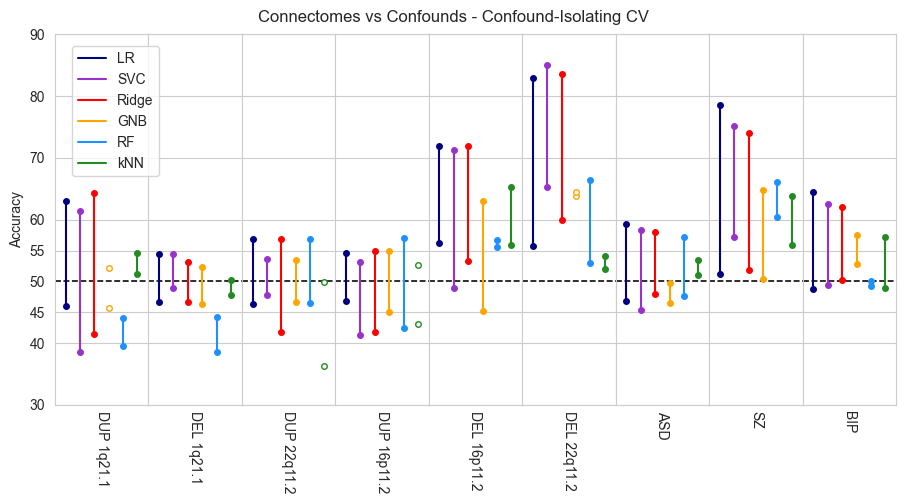

In [54]:
##################
# BENCHMARK PLOT #
##################
title = 'Connectomes vs Confounds - Confound-Isolating CV'

fig,ax = plt.subplots(1,len(cases),figsize=(9,5),sharey=True,sharex=True)

plt.yticks([0,10,20,30,40,45,50,55,60,70,80,90,100])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'
        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[6]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[-1].get_legend_handles_labels()
labels = clfs

ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.08,0.65))
plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'benchmark.png'),dpi=300)

# Confounds Plot

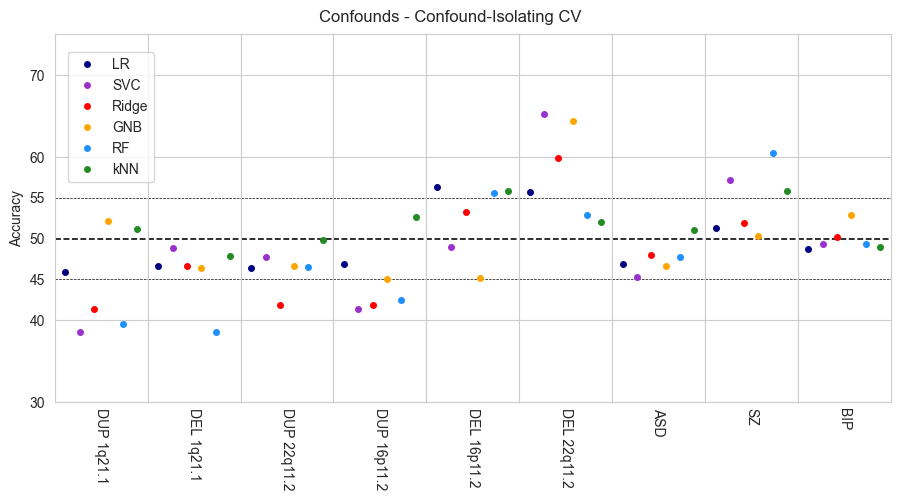

In [52]:
title = 'Confounds - Confound-Isolating CV'

fig,ax = plt.subplots(1,len(cases),figsize=(9,5),sharey=True,sharex=True)

plt.yticks([0,10,20,30,40,45,50,55,60,70,80,90,100])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']

        mfc = colors[i]
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()
        # 0.45
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(0.5)
        b.set_linestyle('--')

        # 0.50
        b = lines[6]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

        # 0.55
        b = lines[7]
        b.set_color('black')
        b.set_linewidth(0.5)
        b.set_linestyle('--')

#handles, _ = ax[0].get_legend_handles_labels()
labels = clfs

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

ax[0].set_ylabel('Accuracy')
handles = []
for j,color in enumerate(colors):
    elem = Line2D([0], [0], marker='o', color='w', label=clfs[j],
                          markerfacecolor=color, markersize=6)
    handles.append(elem)
fig.legend(handles, labels, loc=(0.075,0.635))
plt.suptitle(title)
plt.ylim(30,75)
plt.tight_layout(pad=0.7)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'confounds.png'),dpi=300)